# Second Data Preparation Process

In this notebook file, selected data will be read from Raw Selected pkl file.

Training, Validation and Test images will be resized to (224, 224, 3). 

The reason will be explained in the Training section.

Resized images will be drawn.

Dataframes with resized images will be saved as md5 files for future use after being checked.

In [1]:
#Libraries are being imported
import numpy as np
import cv2
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#Library versions are being printed
print('numpy Version: ' + np.__version__)
print('cv2 Version: ' + cv2.__version__)
print('pandas Version: ' + pd.__version__)
print('matplotlib Version: ' + matplotlib.__version__)

numpy Version: 1.22.3
cv2 Version: 4.5.1
pandas Version: 1.4.3
matplotlib Version: 3.5.2


In [3]:
#Function to draw Image
def DrawImage(imgDf : pd.DataFrame, personDf : pd.DataFrame) -> None:
    plt.figure(figsize=(10,10))
    
    for i in range(imgDf.shape[0]):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        #matplotlib works in RGB color space by default
        #since the images are kept in BGR color space due to the use of opencv in this project
        #color conversion is required to draw a picture
        plt.imshow(cv2.cvtColor(imgDf.iloc[i].ImageBGR, cv2.COLOR_BGR2RGB))
        
        plt.xlabel(personDf.iloc[imgDf.iloc[i].PersonID].Name)
    
    plt.show()
    
    return

In [4]:
#Selected person data is being read from md5 file
personDf = pd.read_pickle("../Data/RawData/Selected/Person.pkl")
personDf

,Name
ID,
0,Abdullah Gul
1,Adrien Brody
2,Ahmed Chalabi
3,Ai Sugiyama
4,Alan Greenspan
...,...
418,Yasser Arafat
419,Yoko Ono
420,Yoriko Kawaguchi


In [5]:
#Selected training data is being read from md5 file
trainingDf = pd.read_pickle("../Data/RawData/Selected/Training.pkl")
trainingDf

,PersonID,ImageBGR
0,121,"[[[158, 183, 193], [159, 184, 194], [159, 184,..."
1,18,"[[[2, 1, 0], [2, 1, 0], [2, 1, 0], [2, 0, 0], ..."
2,160,"[[[2, 0, 3], [2, 0, 3], [4, 0, 3], [4, 0, 3], ..."
3,190,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
4574,30,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4575,120,"[[[78, 74, 55], [80, 76, 57], [84, 77, 60], [8..."
4576,180,"[[[0, 0, 3], [0, 0, 3], [0, 0, 1], [0, 0, 1], ..."
4577,301,"[[[3, 1, 1], [3, 1, 1], [3, 1, 1], [3, 1, 1], ..."


In [6]:
#All Training images are being resized to (224, 224, 3)
#The reason will be explained in the Training section.
for i in range(trainingDf.shape[0]):
    trainingDf.at[i, 'ImageBGR'] = cv2.resize(trainingDf.iloc[i].ImageBGR, (224, 224))

In [7]:
#Shape of the first image of the trainingDf is being checked
trainingDf.iloc[0].ImageBGR.shape

(224, 224, 3)

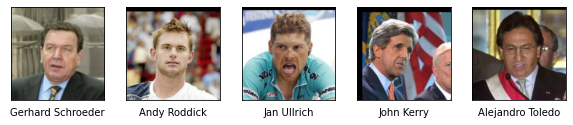

In [8]:
#First 5 images of trainingDf are being drawn
DrawImage(trainingDf.head(), personDf)

In [9]:
#Selected validation data is being read from md5 file
validationDf = pd.read_pickle("../Data/RawData/Selected/Validation.pkl")
validationDf

,PersonID,ImageBGR
0,279,"[[[2, 0, 0], [2, 0, 0], [0, 0, 0], [0, 0, 1], ..."
1,301,"[[[145, 142, 157], [145, 142, 157], [143, 143,..."
2,152,"[[[211, 222, 230], [210, 221, 229], [210, 219,..."
3,421,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,391,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
...,...,...
698,148,"[[[0, 2, 0], [0, 1, 0], [0, 0, 0], [0, 1, 2], ..."
699,192,"[[[2, 0, 0], [2, 0, 0], [2, 0, 0], [2, 0, 0], ..."
700,242,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
701,154,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [10]:
#All Validation images are being resized to (224, 224, 3)
#The reason will be explained in the Training section
for i in range(validationDf.shape[0]):
    validationDf.at[i, 'ImageBGR'] = cv2.resize(validationDf.iloc[i].ImageBGR, (224, 224))

In [11]:
#Shape of the first image of the validationDf is being checked
validationDf.iloc[0].ImageBGR.shape

(224, 224, 3)

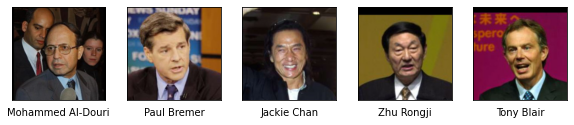

In [12]:
#First 5 images of validationDf are being drawn
DrawImage(validationDf.head(), personDf)

In [13]:
#Selected test data is being read from md5 file
testDf = pd.read_pickle("../Data/RawData/Selected/Test.pkl")
testDf

,PersonID,ImageBGR
0,56,"[[[2, 2, 2], [2, 2, 2], [2, 2, 2], [2, 2, 2], ..."
1,95,"[[[0, 1, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], ..."
2,79,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,18,"[[[169, 181, 205], [191, 205, 227], [182, 197,..."
4,236,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 1, 0], ..."
...,...,...
698,120,"[[[208, 205, 197], [204, 201, 193], [201, 198,..."
699,7,"[[[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], ..."
700,44,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
701,26,"[[[234, 234, 240], [234, 230, 236], [226, 214,..."


In [14]:
##All Test images are being resized to (224, 224, 3)
#The reason will be explained in the Training section.
for i in range(testDf.shape[0]):
    testDf.at[i, 'ImageBGR'] = cv2.resize(testDf.iloc[i].ImageBGR, (224, 224))

In [15]:
#Shape of the first image of the testDf is being checked
testDf.iloc[0].ImageBGR.shape

(224, 224, 3)

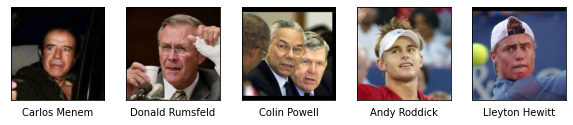

In [16]:
#First 5 images of testDf are being drawn
DrawImage(testDf.head(), personDf)

In [17]:
#Reorganized data is being saved as pkl file for future use
personDf.to_pickle("../Data/ResizedData/Person.pkl")
trainingDf.to_pickle("../Data/ResizedData/FullPhoto/Training.pkl")
validationDf.to_pickle("../Data/ResizedData/FullPhoto/Validation.pkl")
testDf.to_pickle("../Data/ResizedData/FullPhoto/Test.pkl")